# First model

## Autoencoder

Features:

* eth_source
* eth_dst 
* ip_src 
* ip_dst
* ip.len
* ip.tos 
* ip.ttl
* length
* load.count
* protocol
* protocol.dport
* protocol.sport

Scaling: Standard Scalar


In [1]:
import pandas as pd
import numpy as np
import random
from preprocess_df import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [4]:
processed_normal.columns

Index(['octet_1_eth_dst', 'octet_2_eth_dst', 'octet_3_eth_dst',
       'octet_4_eth_dst', 'octet_5_eth_dst', 'octet_6_eth_dst',
       'octet_1_eth_src', 'octet_2_eth_src', 'octet_3_eth_src',
       'octet_4_eth_src', 'octet_5_eth_src', 'octet_6_eth_src',
       'octet_1_ip_src', 'octet_2_ip_src', 'octet_3_ip_src', 'octet_4_ip_src',
       'octet_1_ip_dst', 'octet_2_ip_dst', 'octet_3_ip_dst', 'octet_4_ip_dst',
       'ip.len', 'ip.tos', 'ip.ttl', 'length', 'load.count', 'TCP', 'UDP',
       'protocol.dport', 'protocol.sport'],
      dtype='object')

In [5]:
processed_attack.columns

Index(['octet_1_eth_dst', 'octet_2_eth_dst', 'octet_3_eth_dst',
       'octet_4_eth_dst', 'octet_5_eth_dst', 'octet_6_eth_dst',
       'octet_1_eth_src', 'octet_2_eth_src', 'octet_3_eth_src',
       'octet_4_eth_src', 'octet_5_eth_src', 'octet_6_eth_src',
       'octet_1_ip_src', 'octet_2_ip_src', 'octet_3_ip_src', 'octet_4_ip_src',
       'octet_1_ip_dst', 'octet_2_ip_dst', 'octet_3_ip_dst', 'octet_4_ip_dst',
       'ip.len', 'ip.tos', 'ip.ttl', 'length', 'load.count', 'TCP', 'UDP',
       'protocol.dport', 'protocol.sport'],
      dtype='object')

In [2]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [3]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='ReLU'))
# model.add(Dense(3, activation='ReLU'))
# model.add(Dense(10, activation='ReLU'))
# model.add(Dense(processed_normal.values.shape[1]))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
import keras
model = keras.models.load_model("inital_model")

2022-03-27 18:19:44.870139: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-27 18:19:44.870453: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [11]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-26 14:19:36.014763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1.3048381901257229
1.2974815665012933


<AxesSubplot:>

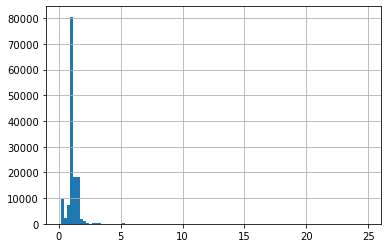

In [14]:
pred_normal = model.predict(processed_normal.values)
normal_score_list = []
#RMSE
for index, x in enumerate(pred_normal):
    normal_score_list.append(np.sqrt(metrics.mean_squared_error(pred_normal[index],processed_normal.values[index])))

normal_df['score'] = normal_score_list
normal_df['score'].hist(bins = 100)

In [4]:
pred_attack = model.predict(processed_attack.values)

2022-03-27 18:20:00.898168: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 18:20:00.950827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


NameError: name 'metrics' is not defined

In [6]:
from sklearn import metrics
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],processed_attack.values[index])))

In [18]:
attack_df['score'] = score_list

Text(0, 0.5, 'Number of packets')

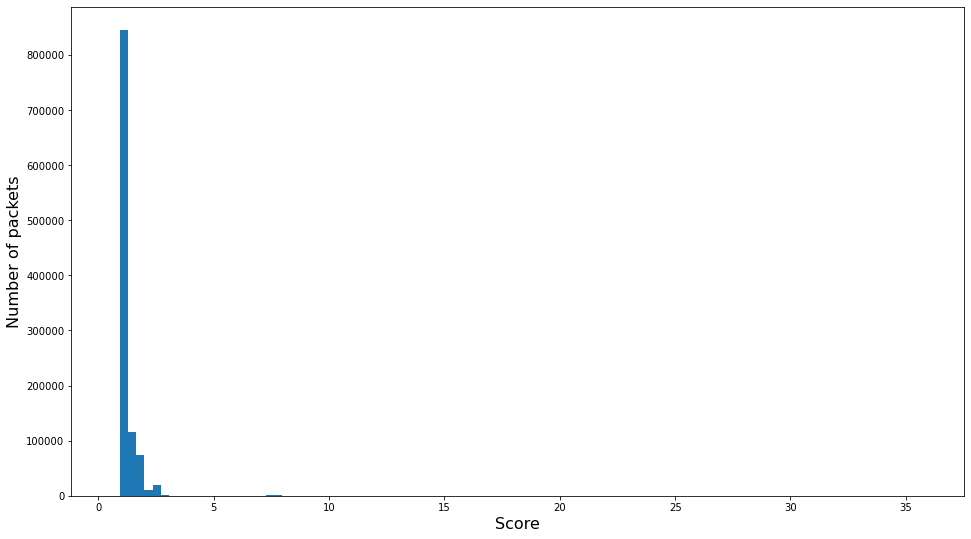

In [19]:
plt.figure(figsize=(16,9))
plt.hist(score_list,bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

Text(0, 0.5, 'Number of packets')

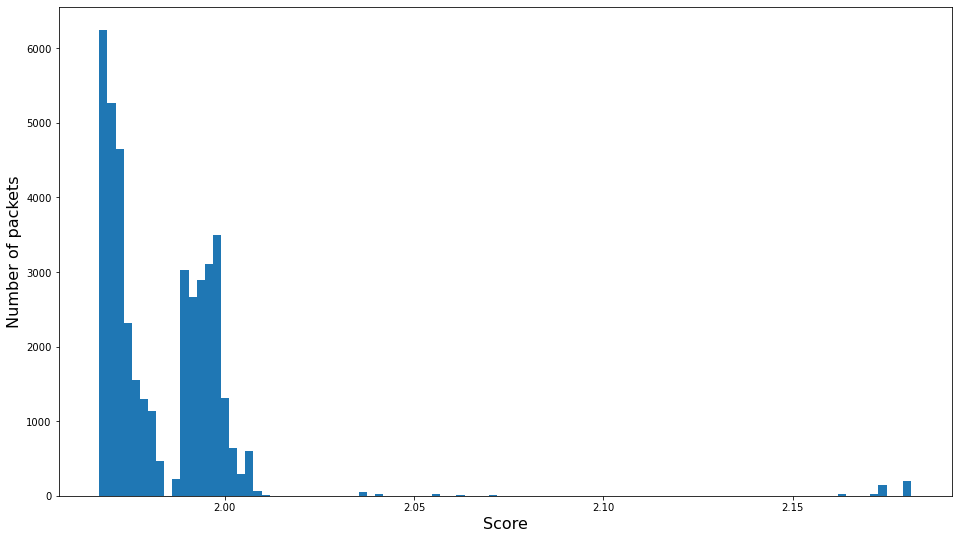

In [21]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']
plt.figure(figsize=(16,9))
plt.hist(list(nmap_df['score']),bins = 100)
plt.xlabel("Score", fontsize = 16)
plt.ylabel("Number of packets",fontsize = 16)

In [17]:
normal_df['score'].describe().apply(lambda x: format(x, 'f'))

count    140538.000000
mean          1.157059
std           0.599993
min           0.206880
25%           1.062798
50%           1.113349
75%           1.307993
max          24.797188
Name: score, dtype: object

In [18]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           1.256844
std            0.647847
min            0.591792
25%            1.045178
50%            1.107527
75%            1.158677
max           35.773061
Name: score, dtype: object

In [24]:
attack_df['score'].quantile(0.71)

1.1490501984855284

In [2]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']

In [3]:
nmap_df.shape

(41824, 56)